In [19]:
# Importaion des packages
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as st
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [20]:
# importation des données
df = pd.read_csv('data.csv')

# Nettoyage du dataset

In [21]:
# Filtrer les colonnes inutiles part1
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [22]:
df = df[['Employee_Name',  'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName',  'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences']]

In [23]:
df.head()

,Employee_Name,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",1,1,5,4,0,62506,0,19,Production Technician I,MA,M,Single,US Citizen,No,White,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",1,5,3,3,0,104437,1,27,Sr. DBA,MA,M,Married,US Citizen,No,White,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",0,5,5,3,0,64955,1,20,Production Technician II,MA,F,Married,US Citizen,No,White,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",0,1,5,3,0,64991,0,19,Production Technician I,MA,F,Married,US Citizen,No,White,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",0,5,5,3,0,50825,1,19,Production Technician I,MA,F,Divorced,US Citizen,No,White,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [24]:
# faire le nom de chaque employé comme index
df.set_index('Employee_Name')

,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
Employee_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Adinolfi, Wilson K",1,1,5,4,0,62506,0,19,Production Technician I,MA,M,Single,US Citizen,No,White,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
"Ait Sidi, Karthikeyan",1,5,3,3,0,104437,1,27,Sr. DBA,MA,M,Married,US Citizen,No,White,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
"Akinkuolie, Sarah",0,5,5,3,0,64955,1,20,Production Technician II,MA,F,Married,US Citizen,No,White,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
"Alagbe,Trina",0,1,5,3,0,64991,0,19,Production Technician I,MA,F,Married,US Citizen,No,White,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
"Anderson, Carol",0,5,5,3,0,50825,1,19,Production Technician I,MA,F,Divorced,US Citizen,No,White,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Woodson, Jason",1,1,5,3,0,65893,0,20,Production Technician II,MA,M,Single,US Citizen,No,White,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
"Ybarra, Catherine",0,5,5,1,0,48513,1,19,Production Technician I,MA,F,Single,US Citizen,No,Asian,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,Google Search,PIP,3.20,2,0,9/2/2015,5,4
"Zamora, Jennifer",0,1,3,4,0,220450,0,6,CIO,MA,F,Single,US Citizen,No,White,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [25]:
# Suppression des employés qui ne sont plus actifs
df = df[df['Termd']!= 1]

In [26]:
# Suppression des colonnes inutiles PART2
df = df[['Employee_Name',  'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
        
       'Department', 'ManagerName',  'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences']]

In [27]:
# dernier verification des valeurs manquantes
df.isnull().sum()

Employee_Name                 0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
Department                    0
ManagerName                   0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
dtype: int64

# Analyse bivariée selon les besoins 

## Existe-t-il une relation entre l’entreprise pour laquelle une personne travaille et son score de performance ?

variables utiles : PerformanceScore et ManagerName

In [28]:
df.head(2)

,Employee_Name,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",1,1,5,4,0,62506,0,19,Production Technician I,MA,M,Single,US Citizen,No,White,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
3,"Alagbe,Trina",0,1,5,3,0,64991,0,19,Production Technician I,MA,F,Married,US Citizen,No,White,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Michael Albert'),
  Text(1, 0, 'Elijiah Gray'),
  Text(2, 0, 'Amy Dunn'),
  Text(3, 0, 'Alex Sweetwater'),
  Text(4, 0, 'Ketsia Liebig'),
  Text(5, 0, 'Brannon Miller'),
  Text(6, 0, 'Peter Monroe'),
  Text(7, 0, 'Simon Roup'),
  Text(8, 0, 'Kelley Spirea'),
  Text(9, 0, 'Webster Butler'),
  Text(10, 0, 'Brandon R. LeBlanc'),
  Text(11, 0, 'Kissy Sullivan'),
  Text(12, 0, 'Jennifer Zamora'),
  Text(13, 0, 'Janet King'),
  Text(14, 0, 'John Smith'),
  Text(15, 0, 'Lynn Daneault'),
  Text(16, 0, 'Eric Dougall'),
  Text(17, 0, 'David Stanley'),
  Text(18, 0, 'Debra Houlihan'),
  Text(19, 0, 'Brian Champaigne'),
  Text(20, 0, 'Board of Directors')])

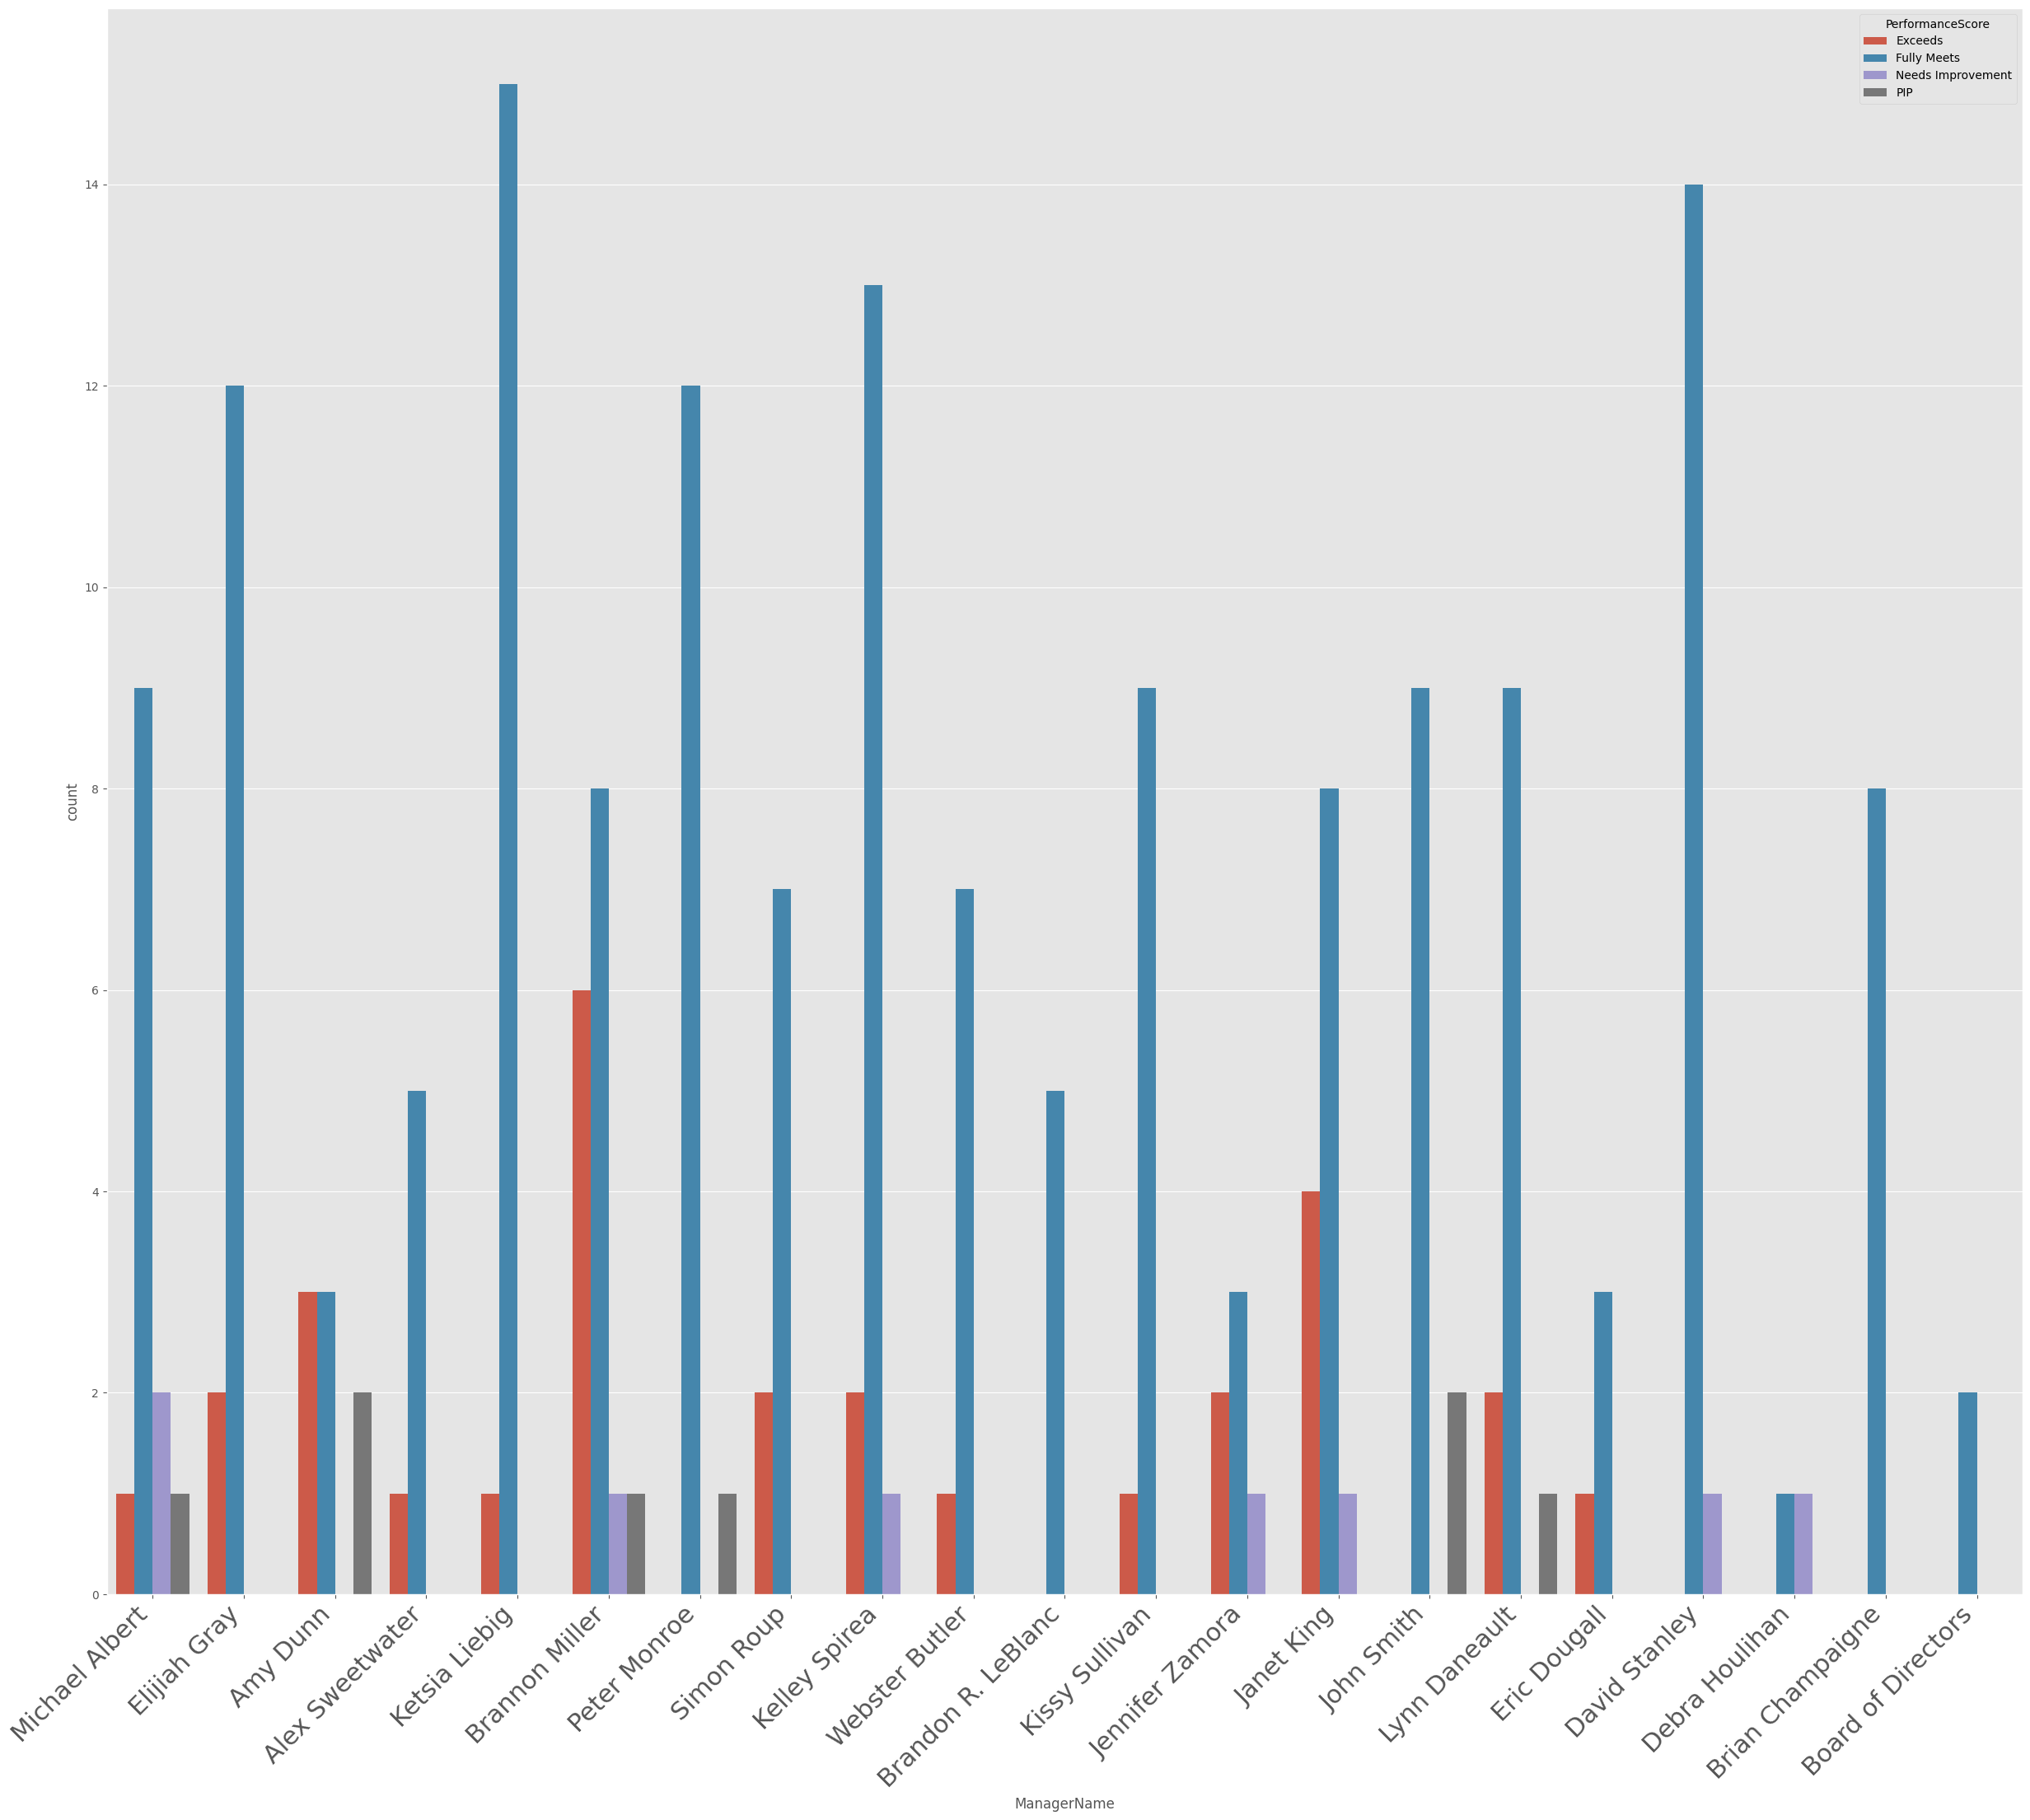

In [29]:
# visualisation
plt.figure (figsize=(30,25))
sns.countplot(data=df, x="ManagerName", hue ="PerformanceScore")
plt.xticks(rotation=45, ha='right', fontsize=22)

# plt.show

In [30]:
# pré-test
from scipy.stats import chi2_contingency

# Création de la table de contigence
table_contigence = pd.crosstab(df['ManagerName'],df['PerformanceScore'])
table_contigence

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,1,5,0,0
Amy Dunn,3,3,0,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,5,0,0
Brannon Miller,6,8,1,1
Brian Champaigne,0,8,0,0
David Stanley,0,14,1,0
Debra Houlihan,0,1,1,0
Elijiah Gray,2,12,0,0


H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.

H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

In [31]:
# test de chi-deux
chi2_stat, p_value, dof, expected_freq = chi2_contingency(table_contigence)

print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)

Statistique du chi-carré : 77.1949514732022
P-valeur : 0.06677353340672786
Degrés de liberté : 60
Fréquences attendues :
 [[ 0.84057971  4.69565217  0.23188406  0.23188406]
 [ 1.12077295  6.26086957  0.30917874  0.30917874]
 [ 0.28019324  1.56521739  0.07729469  0.07729469]
 [ 0.70048309  3.91304348  0.19323671  0.19323671]
 [ 2.24154589 12.52173913  0.61835749  0.61835749]
 [ 1.12077295  6.26086957  0.30917874  0.30917874]
 [ 2.10144928 11.73913043  0.57971014  0.57971014]
 [ 0.28019324  1.56521739  0.07729469  0.07729469]
 [ 1.96135266 10.95652174  0.5410628   0.5410628 ]
 [ 0.56038647  3.13043478  0.15458937  0.15458937]
 [ 1.82125604 10.17391304  0.50241546  0.50241546]
 [ 0.84057971  4.69565217  0.23188406  0.23188406]
 [ 1.5410628   8.60869565  0.42512077  0.42512077]
 [ 2.24154589 12.52173913  0.61835749  0.61835749]
 [ 2.24154589 12.52173913  0.61835749  0.61835749]
 [ 1.40096618  7.82608696  0.38647343  0.38647343]
 [ 1.68115942  9.39130435  0.46376812  0.46376812]
 [ 1.821256

p_value est supérieur à 0.05 donc on ne peut pas rejetter l'hypothèse nul. C'est qui veut dire que la variable ManagerName et PerformanceScore ne sont pas statistiquement liées 

## Y a-t-il des secteurs de l’entreprise où la rémunération n’est pas équitable ?

 variable cible : Departement vs Salary 

In [38]:
df.head()

,Employee_Name,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",1,1,5,4,0,62506,0,19,Production Technician I,MA,M,Single,US Citizen,No,White,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
3,"Alagbe,Trina",0,1,5,3,0,64991,0,19,Production Technician I,MA,F,Married,US Citizen,No,White,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
5,"Anderson, Linda",0,1,5,4,0,57568,0,19,Production Technician I,MA,F,Single,US Citizen,No,White,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",0,1,4,3,0,95660,0,24,Software Engineer,MA,F,Single,US Citizen,No,White,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",1,1,5,3,0,59365,0,19,Production Technician I,MA,M,Widowed,US Citizen,No,White,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19


<Axes: xlabel='Department', ylabel='Salary'>

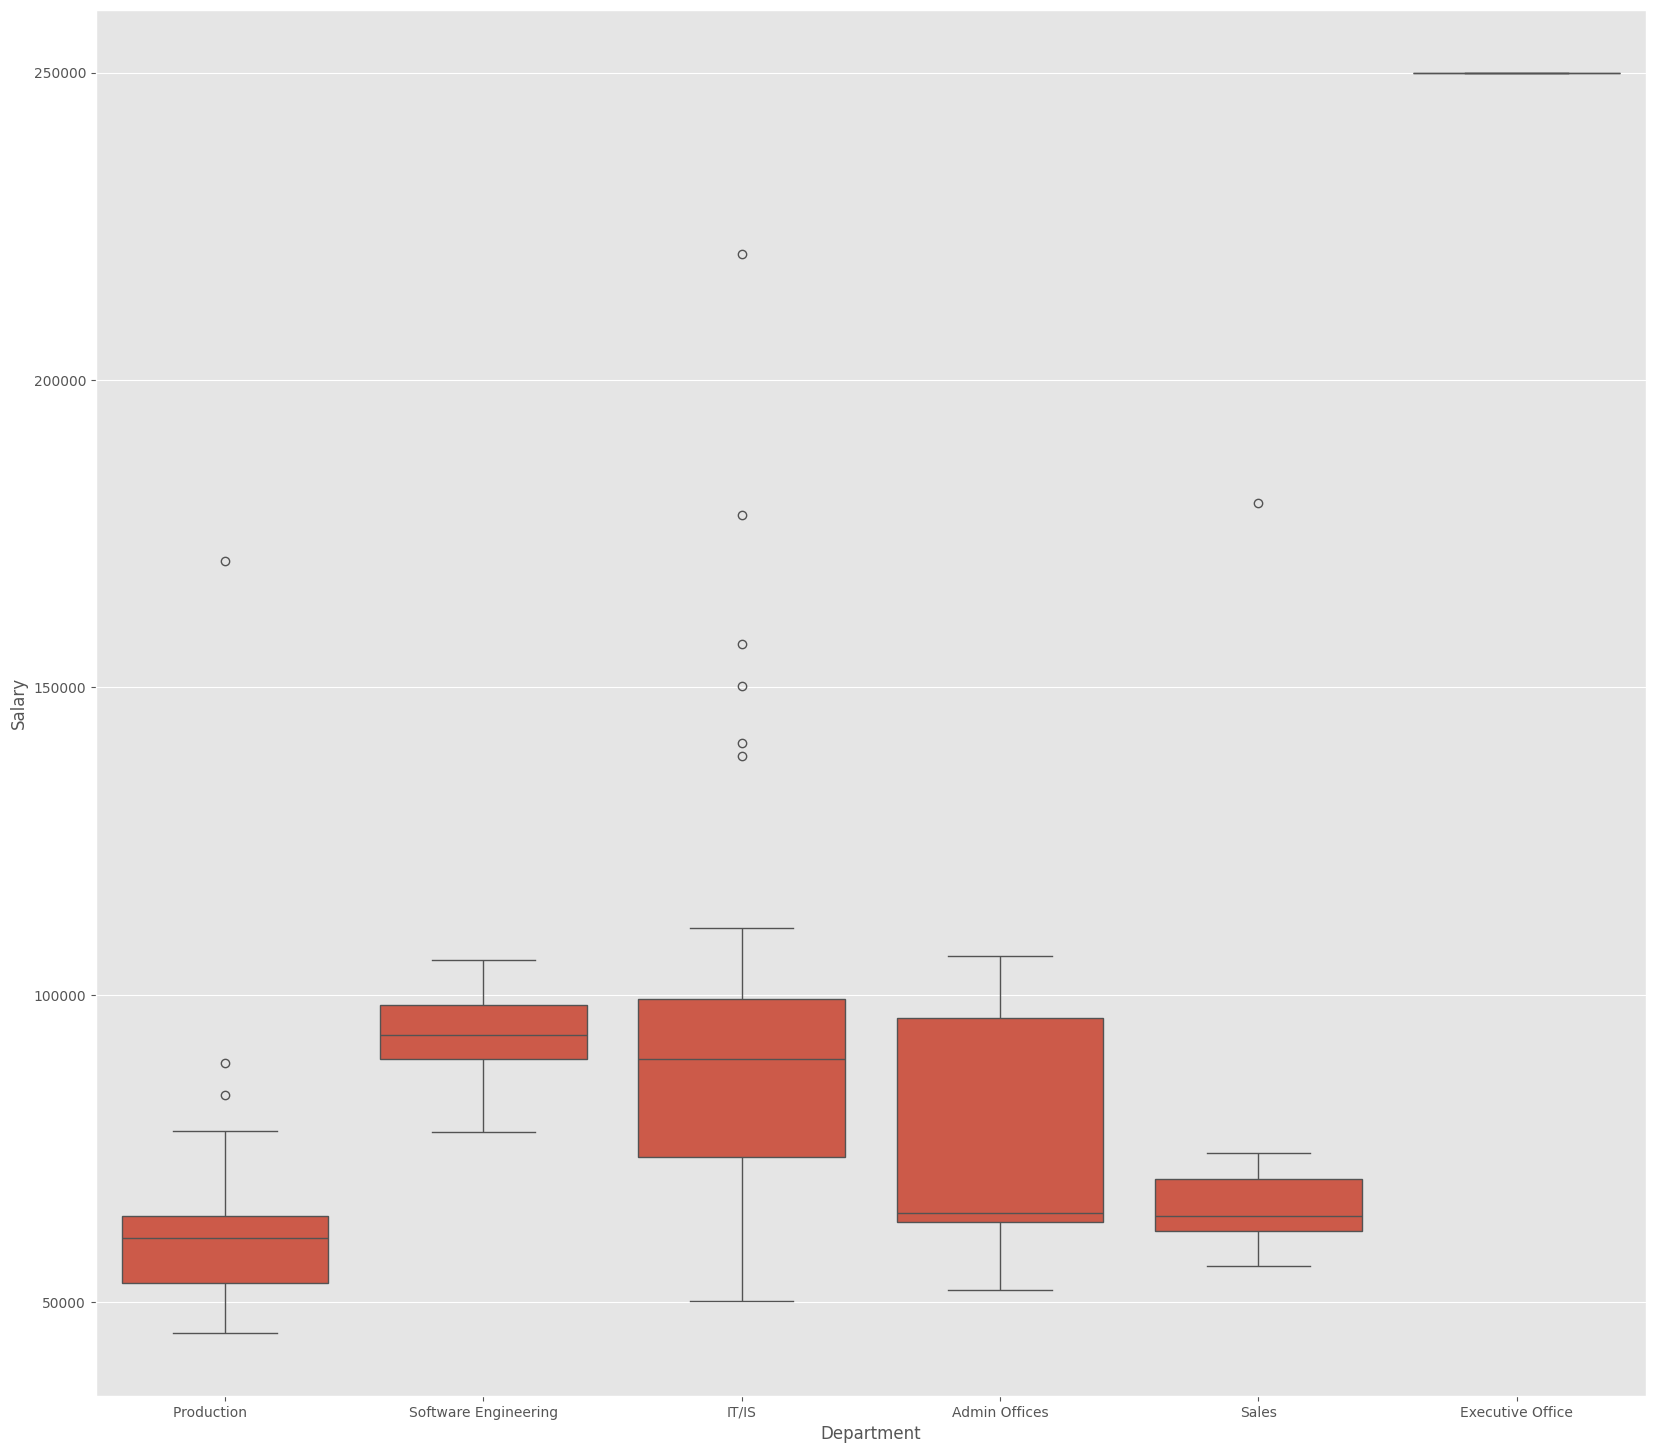

In [33]:
# Visualisation par un boxplot

plt.figure(figsize = (20,18))
sns.boxplot(data = df, x= "Department", y= "Salary")

In [46]:
# Preparation avant le test
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal
new_data = df[["Department", "Salary"]]
new_data

,Department,Salary
0,Production,62506
3,Production,64991
5,Production,57568
6,Software Engineering,95660
7,Production,59365
...,...,...
305,Production,60446
306,Production,65893
308,IT/IS,220450
309,IT/IS,89292


In [69]:
groupe = pd.unique(new_data.Department.values)
d_data = {grp: new_data["Salary"][new_data["Department"] == grp].tolist() for grp in groupe}

print(d_data)

{'Production       ': [62506, 64991, 57568, 59365, 47837, 58709, 70131, 59026, 53250, 51044, 64919, 62910, 66441, 65288, 64375, 63763, 62162, 72640, 52846, 61656, 54237, 60380, 64816, 50373, 63108, 68051, 170500, 63381, 56149, 57583, 56294, 56991, 53189, 51259, 61584, 46335, 75188, 62514, 48888, 54285, 56847, 71776, 65902, 64057, 58530, 52249, 53171, 51337, 57815, 53018, 59892, 66825, 48285, 66149, 49256, 62957, 54828, 64246, 62065, 46998, 55425, 69340, 64995, 51908, 61242, 45069, 60724, 60436, 63322, 50482, 46654, 63973, 46120, 64738, 77915, 63450, 73330, 52057, 45395, 62385, 61349, 54132, 55315, 62810, 55688, 83667, 58207, 72460, 72106, 63430, 74417, 57575, 48495, 52984, 62061, 66738, 47414, 53060, 74226, 47001, 59472, 46738, 63353, 60627, 47750, 57975, 56147, 50923, 52087, 60656, 58939, 64021, 65714, 47961, 61355, 63682, 63025, 59238, 56339, 63025, 88976, 62068, 66541, 60446, 65893, 45046], 'Software Engineering': [95660, 77692, 93396, 101199, 105688, 86214, 92989], 'IT/IS': [50178,

In [70]:
# Affectation de chaque groupe dans une variable 
Production = d_data['Production       ']
Soft_E = d_data['Software Engineering']
IT = d_data['IT/IS']
Admin = d_data['Admin Offices']
Sales = d_data['Sales']
Exe_Off = d_data['Executive Office']

In [72]:
# Test Levene pour voir si chaque groupes sont homogènes ou pas
from scipy import stats
# Production = [int(x) for x in Production]
# Soft_E = [int(x) for x in Soft_E]
# IT = [int(x) for x in IT]
# Admin = [int(x) for x in Admin]
# Sales = [int(x) for x in Sales]
# Exe_Off = [int(x) for x in Exe_Off]
# Test de Levene
stat, p = stats.levene(
    Production,
    Soft_E,
    IT,
    Admin,
    Sales,
    Exe_Off
)

print("Statistique de Levene:", stat)
print("P-value:", p)
print("p < 0.05, on rejettes l’hypothèse nulle = les variances ne sont pas égales.")

Statistique de Levene: 5.791398555509888
P-value: 5.096541759251741e-05
p < 0.05, tu rejettes l’hypothèse nulle = les variances ne sont pas égales.


In [78]:
# Verfification du normalité 
p_prod = stats.shapiro(Production)
p_soft = stats.shapiro(Soft_E)
p_IT = stats.shapiro(IT)
p_admin = stats.shapiro(Admin)
p_sales = stats.shapiro(Sales)
p_Exe_Off = stats.shapiro(Exe_Off)
print("p_value du production est =",p_prod)
print("p_value du soft est =",p_soft)
print("p_value du IT est =",p_IT)
print("p_value du admin est =",p_admin)
print("p_value du sales est =",p_sales)
print("p_value du Exe est =",p_Exe_Off)

p_value du production est = ShapiroResult(statistic=np.float64(0.6341186372097065), pvalue=np.float64(2.926735591583773e-16))
p_value du soft est = ShapiroResult(statistic=np.float64(0.9703590282597306), pvalue=np.float64(0.9010242587564031))
p_value du IT est = ShapiroResult(statistic=np.float64(0.8537104031506282), pvalue=np.float64(0.00011083859231445673))
p_value du admin est = ShapiroResult(statistic=np.float64(0.8652656209696756), pvalue=np.float64(0.16864920246807769))
p_value du sales est = ShapiroResult(statistic=np.float64(0.39317647327445004), pvalue=np.float64(2.485853121885754e-09))
p_value du Exe est = ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))


C:\Users\Admin\AppData\Local\Temp\ipykernel_2140\573186942.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  p_Exe_Off = stats.shapiro(Exe_Off)


In [79]:
# Test de Kruskall-Wallis
from scipy import stats

stat, p = stats.kruskal(
    Production,
    Soft_E,
    IT,
    Admin,
    Sales,
    Exe_Off
)

print("Statistique de Kruskal-Wallis:", stat)
print("P-value:", p)

Statistique de Kruskal-Wallis: 71.88109215068816
P-value: 4.1586869476273053e-14


ça veut dire qu'il y a une différence significative entre la moyenne de salaire entre ces departement